In [42]:
!pip install shap



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False
# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor

In [45]:
import os
os.chdir(r"C:\Users\lizzy\OneDrive\바탕 화면\실전프로젝트")
print(os.getcwd())  # 잘 바뀌었는지 확인

C:\Users\lizzy\OneDrive\바탕 화면\실전프로젝트


In [46]:
milk_content = pd.read_csv("data/interim/milk.csv")

In [47]:
milk_content.columns

Index(['농장아이디', '개체번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백', '무지고형분', '체세포수',
       'MUN', '305일유량', '305일유지량', '305일유단백', '305일무지고형분', '성년유량', '성년유지량',
       '성년유단백량', '성년무지고형분량', '전산차비유지속성', '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량',
       '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MUN', '최고유량체세포', '건유전마지막유량',
       '전산차건유전유량', '출생일자', '산차', '농후사료비(연계)', '농후사료급여량(연계)', '공태일수', '유량',
       '질병군', '우유등급', '비유초기평균MUN.1', '비유최고도달일수_log', '건유전마지막유량_log',
       '공태일수_log', '출생년도', 'PF비'],
      dtype='object')

In [48]:
milk_content['출생일자']

0        2007-12-10
1        2007-12-10
2        2007-12-10
3        2007-12-10
4        2007-12-10
            ...    
58436    2019-07-23
58437    2019-08-04
58438    2019-08-04
58439    2019-08-31
58440    2019-08-31
Name: 출생일자, Length: 58441, dtype: object

In [49]:
milk_content['검정일자']

0        2021-03-18
1        2021-04-28
2        2021-05-20
3        2021-06-25
4        2021-07-07
            ...    
58436    2021-12-04
58437    2021-11-01
58438    2021-12-04
58439    2021-11-01
58440    2021-12-04
Name: 검정일자, Length: 58441, dtype: object

In [50]:
milk_content['공태일수']

0        619
1        619
2        619
3        619
4        619
        ... 
58436      0
58437      0
58438      0
58439      0
58440      0
Name: 공태일수, Length: 58441, dtype: int64

In [51]:
milk_content['출생일자'] = pd.to_datetime(milk_content['출생일자'], format='%Y-%m-%d')
milk_content['검정일자'] = pd.to_datetime(milk_content['검정일자'], format='%Y-%m-%d')

# 출생일자 컬럼의 최대값 찾기
max_birthdate = milk_content['출생일자'].max()
min_date = milk_content['검정일자'].min()

print("가장 늦은 출생일자:", max_birthdate)
print("가장 빠른 검정일자:", min_date)

가장 늦은 출생일자: 2020-01-17 00:00:00
가장 빠른 검정일자: 2020-01-01 00:00:00


In [52]:
# 출생일자가 2020-01-17인 행 필터링
result = milk_content[milk_content['출생일자'] == '2020-01-17']
pd.set_option('display.float_format', '{:.0f}'.format)

# 해당 개체번호 확인
display(result[['개체번호']].iloc[0])

개체번호   20200117010077
Name: 57436, dtype: float64

In [53]:
milk_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58441 entries, 0 to 58440
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   농장아이디         58441 non-null  int64         
 1   개체번호          58441 non-null  float64       
 2   검정일자          58441 non-null  datetime64[ns]
 3   누적착유일(연계)     58441 non-null  int64         
 4   유지방율          42084 non-null  float64       
 5   유단백           42084 non-null  float64       
 6   무지고형분         42084 non-null  float64       
 7   체세포수          58441 non-null  int64         
 8   MUN           42084 non-null  float64       
 9   305일유량        43678 non-null  float64       
 10  305일유지량       43678 non-null  float64       
 11  305일유단백       43678 non-null  float64       
 12  305일무지고형분     43678 non-null  float64       
 13  성년유량          43678 non-null  float64       
 14  성년유지량         43678 non-null  float64       
 15  성년유단백량        43678 non-null  float6

In [54]:
milk_content['우유등급'].unique()


array(['2등급이하', '1등급'], dtype=object)

In [55]:
milk_content['우유등급'] = milk_content['우유등급'].map({'1등급': 1, '2등급이하': 0})


print(milk_content['우유등급'].dtypes)

int64


In [56]:
# 날짜 차이 계산 (일 단위)
milk_content['나이'] = (milk_content['검정일자'] - milk_content['출생일자']).dt.days

# 음수 값(출생일자가 검정일자보다 큰 경우)은 0으로 처리
milk_content['나이'] = milk_content['나이'].apply(lambda x: max(x, 0))
milk_content['나이'] = (milk_content['나이'] / 365).astype(int)

milk_content

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,MUN,305일유량,...,유량,질병군,우유등급,비유초기평균MUN.1,비유최고도달일수_log,건유전마지막유량_log,공태일수_log,출생년도,PF비,나이
0,21133,20071210010043,2021-03-18,445,7,3,9,274,12,15158,...,76169939,0,0,NaN,4,4,6,2007,0,13
1,21133,20071210010043,2021-04-28,486,4,3,9,166,11,15158,...,76170244,0,1,NaN,4,4,6,2007,1,13
2,21133,20071210010043,2021-05-20,508,3,3,9,156,11,15158,...,76170487,0,1,NaN,4,4,6,2007,1,13
3,21133,20071210010043,2021-06-25,544,4,3,9,307,14,15158,...,76170734,0,0,NaN,4,4,6,2007,1,13
4,21133,20071210010043,2021-07-07,556,4,4,9,34,16,15158,...,76170903,0,1,NaN,4,4,6,2007,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,21149,20210101010061,2021-12-04,106,4,3,9,140,16,7577,...,76151371,0,1,NaN,4,NaN,0,2019,1,2
58437,21149,20210101010062,2021-11-01,12,4,4,9,307,10,NaN,...,76151247,0,0,NaN,4,NaN,0,2019,1,2
58438,21149,20210101010062,2021-12-04,45,4,3,9,20,14,NaN,...,76151345,0,1,NaN,4,NaN,0,2019,1,2
58439,21149,20210101010065,2021-11-01,9,5,4,10,285,12,NaN,...,76151184,0,0,NaN,4,NaN,0,2019,1,2


In [57]:
df_milk = milk_content[['유지방율', '유단백', '무지고형분', '체세포수', 'MUN',   
'산차', '농후사료비(연계)', '농후사료급여량(연계)', '유량', '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MUN', '질병군', '우유등급', '공태일수_log', 'PF비', '나이']]

In [58]:
df_milk

,유지방율,유단백,무지고형분,체세포수,MUN,산차,농후사료비(연계),농후사료급여량(연계),유량,비유초기평균유지율,비유초기평균단백율,비유초기평균MUN,질병군,우유등급,공태일수_log,PF비,나이
0,7,3,9,274,12,8,0,0,76169939,3,3,12,0,0,6,0,13
1,4,3,9,166,11,8,0,0,76170244,3,3,12,0,1,6,1,13
2,3,3,9,156,11,8,0,0,76170487,3,3,12,0,1,6,1,13
3,4,3,9,307,14,8,0,0,76170734,3,3,12,0,0,6,1,13
4,4,4,9,34,16,8,0,0,76170903,3,3,12,0,1,6,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,4,3,9,140,16,1,0,1,76151371,4,3,14,0,1,0,1,2
58437,4,4,9,307,10,1,0,1,76151247,4,3,12,0,0,0,1,2
58438,4,3,9,20,14,1,0,1,76151345,4,3,12,0,1,0,1,2
58439,5,4,10,285,12,1,0,1,76151184,4,3,14,0,0,0,1,2


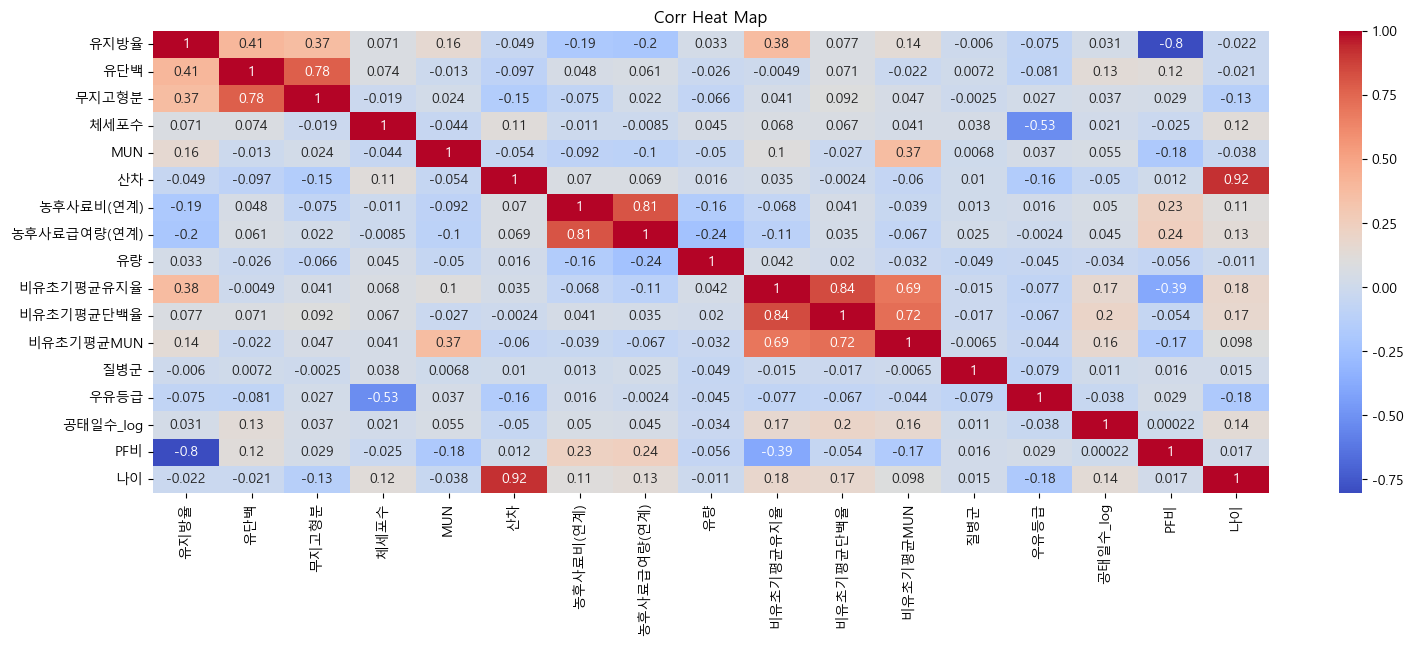

In [59]:
df_milk_corr = df_milk.corr()


plt.figure(figsize=(18, 6))
sns.heatmap(
    data= df_milk_corr,
    annot= True,
    cmap= 'coolwarm')
plt.title("Corr Heat Map")
plt.show()

In [60]:
milk_content['검정연도']=milk_content['검정일자'].dt.year
milk_content['검정연도'].unique()

array([2021, 2020, 2022], dtype=int32)

In [61]:
df_milk = milk_content[['검정연도','유지방율', '유단백', '무지고형분', '체세포수', 'MUN', '산차', '농후사료비(연계)',    
'농후사료급여량(연계)', '유량', '누적착유일(연계)', '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MUN', '공태일수', 'PF비']]

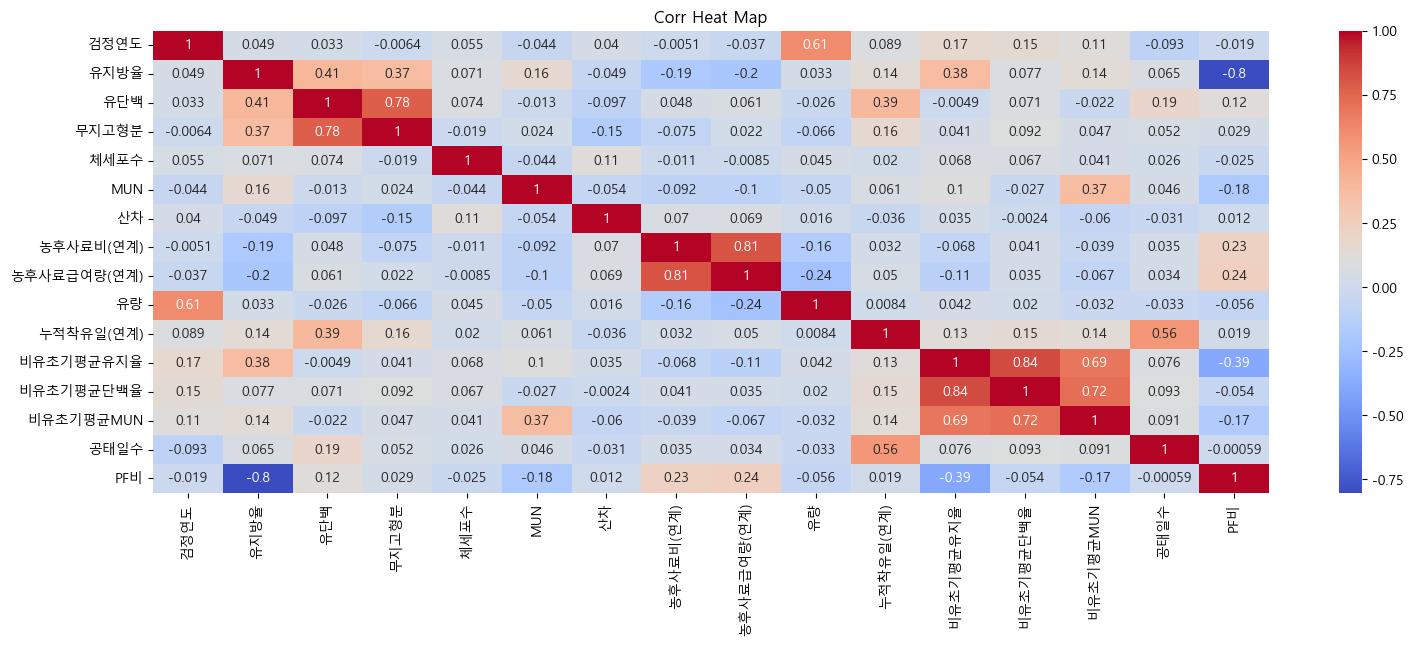

In [62]:
df_milk_corr = df_milk.corr()


plt.figure(figsize=(18, 6))
sns.heatmap(
    data= df_milk_corr,
    annot= True,
    cmap= 'coolwarm')
plt.title("Corr Heat Map")
plt.show()

In [63]:
df_milk

,검정연도,유지방율,유단백,무지고형분,체세포수,MUN,산차,농후사료비(연계),농후사료급여량(연계),유량,누적착유일(연계),비유초기평균유지율,비유초기평균단백율,비유초기평균MUN,공태일수,PF비
0,2021,7,3,9,274,12,8,0,0,76169939,445,3,3,12,619,0
1,2021,4,3,9,166,11,8,0,0,76170244,486,3,3,12,619,1
2,2021,3,3,9,156,11,8,0,0,76170487,508,3,3,12,619,1
3,2021,4,3,9,307,14,8,0,0,76170734,544,3,3,12,619,1
4,2021,4,4,9,34,16,8,0,0,76170903,556,3,3,12,619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,2021,4,3,9,140,16,1,0,1,76151371,106,4,3,14,0,1
58437,2021,4,4,9,307,10,1,0,1,76151247,12,4,3,12,0,1
58438,2021,4,3,9,20,14,1,0,1,76151345,45,4,3,12,0,1
58439,2021,5,4,10,285,12,1,0,1,76151184,9,4,3,14,0,1


In [64]:
# 출생연도가 이미 숫자형(int)이라고 가정
# 만약 object라면 df['출생연도'] = df['출생연도'].astype(int) 필요

# train: 출생연도 == 2020
train = df_milk[df_milk['검정연도'] == 2020]

# test: 출생연도 == 2021
test = df_milk[df_milk['검정연도'] == 2021]

# 독립변수(X), 종속변수(y) 분리 예시
X_train = train.drop(columns=['공태일수', '검정연도'])
y_train = train['공태일수']

X_test = test.drop(columns=['공태일수', '검정연도'])
y_test = test['공태일수']

In [65]:
X_train

,유지방율,유단백,무지고형분,체세포수,MUN,산차,농후사료비(연계),농후사료급여량(연계),유량,누적착유일(연계),비유초기평균유지율,비유초기평균단백율,비유초기평균MUN,PF비
9,3,3,9,117,12,9,1,1,15010595,92,4,3,13,1
10,4,3,9,107,15,9,1,1,15010687,125,4,3,13,1
11,NaN,NaN,NaN,0,NaN,9,1,1,15010779,125,4,3,13,NaN
12,NaN,NaN,NaN,0,NaN,9,1,1,15010871,125,4,3,13,NaN
13,3,3,9,866,10,9,1,1,15010963,224,4,3,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58363,4,4,9,656,16,1,0,1,16260337,292,3,3,13,1
58364,4,3,10,161,16,1,0,1,16260400,335,3,3,13,1
58365,5,4,10,292,23,1,0,1,16260526,356,3,3,13,1
58366,NaN,NaN,NaN,0,NaN,1,0,1,16260540,367,3,3,13,NaN


In [66]:
y_train

9        202
10       202
11       202
12       202
13       202
        ... 
58363    147
58364    147
58365    147
58366    147
58367      0
Name: 공태일수, Length: 30075, dtype: int64

In [67]:
y_test

0        619
1        619
2        619
3        619
4        619
        ... 
58436      0
58437      0
58438      0
58439      0
58440      0
Name: 공태일수, Length: 28298, dtype: int64

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def regression_metrics(y_true, y_pred, n_features):
    """

    Parameters:
    - y_true: 실제 값 (array-like)
    - y_pred: 예측 값 (array-like)
    - n_features: 입력 변수(특성) 수 (int)

    Returns:
    - dict: MSE, MAE, RMSE, R2, Adjusted R2
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

    return {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2, # 1-어쩌구저쩌구(성능을저하시키는지표) = 전체 성능에서 얼마나 방해가 있었는지 알려주는 지표. 얘가 마이너스면? 모델이 동전던지기보다 못 맞힌다.
        "Adjusted R2": adj_r2
    }

In [69]:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    tree_method="hist",
    device="cuda",
    random_state=42)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]}

In [70]:
grid_search1 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

In [71]:
grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\lizzy\스파르타_파이썬\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lizzy\스파르타_파이썬\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:17:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 3, ...], 'n_estimators': [200, 300]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [72]:
print("Best Parameters:", grid_search1.best_params_)
print("Best Score (Negative MAE):", grid_search1.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score (Negative MAE): -79.08186594645183


In [73]:
best_model_milk = grid_search1.best_estimator_

In [74]:
y_pred_milk_amount = best_model_milk.predict(X_test)


In [75]:
regression_metrics(y_test, y_pred_milk_amount, 3)

{'MSE': 12011.759765625,
 'MAE': 87.21598815917969,
 'RMSE': np.float64(109.59817409804326),
 'R2': 0.20536917448043823,
 'Adjusted R2': 0.2052849201340553}

In [76]:
best_model_milk.feature_importances_

array([0.07986014, 0.01942782, 0.03778348, 0.01185095, 0.02476113,
       0.20773879, 0.02030892, 0.04474429, 0.04549837, 0.35631186,
       0.03693356, 0.02690612, 0.03090828, 0.05696634], dtype=float32)

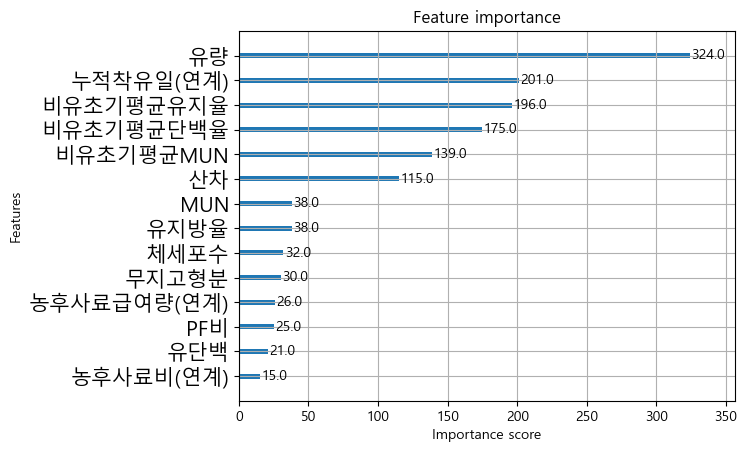

In [77]:
from xgboost import plot_importance
plot_importance(best_model_milk)
plt.yticks(fontsize=15)
plt.show()

In [78]:
df_milk.isnull().sum()

검정연도               0
유지방율           16357
유단백            16357
무지고형분          16357
체세포수               0
MUN            16357
산차              3449
농후사료비(연계)          0
농후사료급여량(연계)        0
유량                 0
누적착유일(연계)          0
비유초기평균유지율          1
비유초기평균단백율          2
비유초기평균MUN          1
공태일수               0
PF비            16522
dtype: int64

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# 파이프라인 정의: 결측치 처리 → 표준화 → 랜덤포레스트 회귀
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# 탐색할 파라미터 설정 (rf 단계에 맞춰 prefix 붙이기)
param_grid = {
    'rf__n_estimators': [200, 300, 500],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2, 5],
    'rf__max_features': ['sqrt', 0.7, None]
}

# GridSearchCV 설정
grid_search_rf = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',   # 회귀 문제이므로 R² 사용
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 학습
grid_search_rf.fit(X_train, y_train)

# 결과 확인
print("Best Params:", grid_search_rf.best_params_)
print("Best Score (R²):", grid_search_rf.best_score_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Params: {'rf__max_depth': 10, 'rf__max_features': None, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 500}
Best Score (R²): 0.2544627606302701
